In [62]:
%matplotlib inline

In [111]:
from __future__ import division

import sys

import numpy as np
import pandas as pd

import sklearn
from sklearn import svm

import entrainment_pred

In [78]:
full = pd.read_csv("data/step3/full.csv")

In [67]:
_, target_cols = entrainment_pred.separate_cols(full)

In [68]:
target_cols

{'avg_different_words',
 'avg_total_words',
 'pd_avg_total_different_words',
 'pd_avg_total_words'}

In [85]:
search_adw = entrainment_pred.run(full, 'avg_different_words')

----------------------------------------------------------------------------------------------------
###################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [86]:
search_adw.best_score_

-0.22068354414812291

In [87]:
search_atw = entrainment_pred.run(full, 'avg_total_words')

----------------------------------------------------------------------------------------------------
###################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [88]:
search_atw.best_score_

-0.16247361331191351

In [81]:
search_p_atw = entrainment_pred.run(full, 'pd_avg_total_words')

----------------------------------------------------------------------------------------------------
###################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [82]:
search_p_atw.best_score_

0.078913430156424977

In [83]:
search_p_atdw = entrainment_pred.run(full, 'pd_avg_total_different_words')

----------------------------------------------------------------------------------------------------
###################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [84]:
search_p_atdw.best_score_

0.14164525535726216

### Calculate Coefficients and Plot Closeness to Fit

In [112]:
def calc_coeffs(best_estimator, cv, data, target):

    def _calc_coeffs(predicted_hist):
        n_iter = cv.n_iter
        print('-' * n_iter)

        svr = best_estimator.named_steps['svr']
        def fit(train):
            best_estimator.fit(data.iloc[train], target.iloc[train])

        def predict(test):
            predicted = best_estimator.predict(data.iloc[test]).tolist()
            for i in test:
                predicted_hist[i].append(predicted.pop())

        def coeffs_fn():
            sys.stdout.write('#')
            return svr.coef_.copy()

        coeffs = entrainment_pred.calc_coeffs(cv, fit, coeffs_fn, predict)
        return coeffs, predicted_hist
    
    return _calc_coeffs({i:[] for i in range(len(target))})
    

In [114]:
data_adw, target_adw = entrainment_pred.separate(full, 'avg_different_words')
coeffs_adw, predict_hist_adw = calc_coeffs(search_adw.best_estimator_, search_adw.cv, data_adw, target_adw)

----------------------------------------------------------------------------------------------------
####################################################################################################

In [133]:
import matplotlib.pyplot as plt

def plot(predict_hist, target, title):
    pmns = [np.mean(predict_hist[i]) for i in range(len(target))]
    plt.scatter(range(len(pmns)), pmns, c='y')
    plt.plot(target, marker='*')
    plt.title(title)

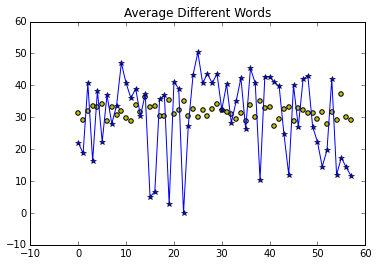

In [134]:
plot(predict_hist_adw, target_adw, 'Average Different Words')

In [127]:
data_atw, target_atw = entrainment_pred.separate(full, 'avg_total_words')
coeffs_atw, predict_hist_atw = calc_coeffs(search_atw.best_estimator_, search_atw.cv, data_atw, target_atw)

----------------------------------------------------------------------------------------------------
####################################################################################################

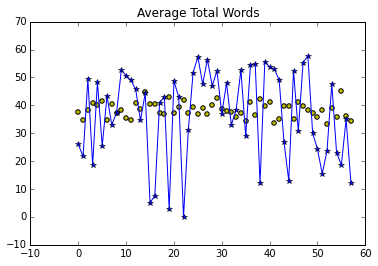

In [137]:
plot(predict_hist_atw, target_atw, 'Average Total Words')

In [136]:
data_p_atw, target_p_atw = entrainment_pred.separate(full, 'pd_avg_total_words')
coeffs_p_atw, predict_hist_p_atw = calc_coeffs(search_p_atw.best_estimator_, 
                                           search_p_atw.cv, 
                                           data_p_atw, 
                                           target_p_atw)

----------------------------------------------------------------------------------------------------
####################################################################################################

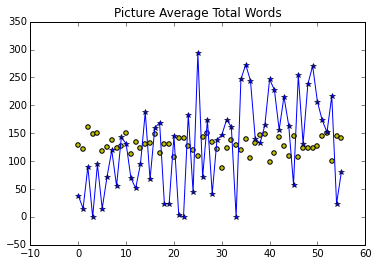

In [138]:
plot(predict_hist_p_atw, target_p_atw, 'Picture Average Total Words')

In [140]:
data_p_atdw, target_p_atdw = entrainment_pred.separate(full, 'pd_avg_total_different_words')
coeffs_p_atdw, predict_hist_p_atdw = calc_coeffs(search_p_atdw.best_estimator_, 
                                           search_p_atdw.cv, 
                                           data_p_atdw, 
                                           target_p_atdw)

----------------------------------------------------------------------------------------------------
####################################################################################################

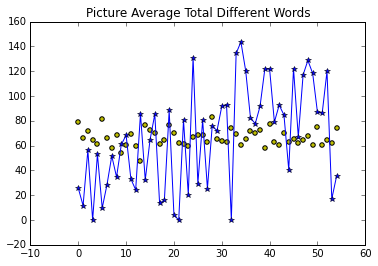

In [157]:
plot(predict_hist_p_atdw, target_p_atdw, 'Picture Average Total Different Words')